<h1>Dados Covid-19</h1>

<p>Dados obtidos do site <a href="https://brasil.io">Brasil.io</a>. O qual disponibiliza não apenas os dados como também documentação, diversas visualizações dos dados, uma API de acesso, código fonte de tudo além de boa documentação.</p>

<p>URL direta dos dados: <a href="https://brasil.io/dataset/covid19/files/">https://brasil.io/dataset/covid19/files/</a>.</p>

<p>Data de download: 02/03/2021</p>

<h2>Análise Exploratória</h2>
<p>Tentar obter o máximo de informações do conjunto de dados.</p>

<p>Carga dos dados.</p>

In [1]:
arquivo <- "caso.csv"

if (! file.exists(arquivo)) {
  url <- "https://data.brasil.io/dataset/covid19/caso.csv.gz"
  download.file(url, destfile = arquivo, method = "curl")
  untar('caso.csv.gz')
}

dados <- read.csv(arquivo, header = TRUE, stringsAsFactors = FALSE)

<p>Os dados já vem com um cabeçalho, o que ajuda muito!</p>
<p>No github referente ao site <a href="https://brasil.io">Brasil.io</a>, existe documentação relacionada aos dados, a qual reproduzo logo abaixo. Quem quiser pode acessar a documentação original clicando <a href="https://github.com/turicas/covid19-br/blob/master/api.md#casos">aqui</a>.</p>
<p>Colunas:</p>
<ul>
<li>date: data de coleta dos dados no formato YYYY-MM-DD.</li>
<li>state: sigla da unidade federativa, exemplo: SP.</li>
<li>city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).</li>
<li>place_type: tipo de local que esse registro descreve, pode ser city ou state.</li>
<li>order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.</li>
<li>is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).</li>
<li>city_ibge_code: código IBGE do local.</li>
<li>confirmed: número de casos confirmados.</li>
<li>deaths: número de mortes.</li>
<li>estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).</li>
<li>estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.</li>
<li>confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).</li>
<li>death_rate: taxa de mortalidade (mortes / confirmados).</li>
</ul>
<p>Ainda assim, vamos fazer uma análise exploratória:</p>

<p>Vejamos algumas linhas das informações que ele traz.</p>

In [2]:
head(dados)

date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
2021-03-15,AC,,state,62940,1129,364,True,881935,894470,12,7036.569,0.0179
2021-03-14,AC,,state,62620,1122,363,False,881935,894470,12,7000.794,0.0179
2021-03-13,AC,,state,62332,1116,362,False,881935,894470,12,6968.596,0.0179
2021-03-12,AC,,state,61709,1106,361,False,881935,894470,12,6898.946,0.0179
2021-03-11,AC,,state,61394,1094,360,False,881935,894470,12,6863.729,0.0178
2021-03-10,AC,,state,61121,1083,359,False,881935,894470,12,6833.208,0.0177


In [3]:
tail(dados)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1616754,2020-06-24,SP,Óleo,city,1,0,6,False,2496,2471,3533809,40.46945,0
1616755,2020-06-23,SP,Óleo,city,1,0,5,False,2496,2471,3533809,40.46945,0
1616756,2020-06-22,SP,Óleo,city,1,0,4,False,2496,2471,3533809,40.46945,0
1616757,2020-06-21,SP,Óleo,city,1,0,3,False,2496,2471,3533809,40.46945,0
1616758,2020-06-20,SP,Óleo,city,1,0,2,False,2496,2471,3533809,40.46945,0
1616759,2020-06-19,SP,Óleo,city,1,0,1,False,2496,2471,3533809,40.46945,0


<p>Informações básicas sobre os atributos do conjunto de dados:</p>

In [4]:
str(dados)

'data.frame':	1616759 obs. of  13 variables:
 $ date                          : chr  "2021-03-15" "2021-03-14" "2021-03-13" "2021-03-12" ...
 $ state                         : chr  "AC" "AC" "AC" "AC" ...
 $ city                          : chr  "" "" "" "" ...
 $ place_type                    : chr  "state" "state" "state" "state" ...
 $ confirmed                     : int  62940 62620 62332 61709 61394 61121 60721 60656 60288 60070 ...
 $ deaths                        : int  1129 1122 1116 1106 1094 1083 1071 1066 1063 1054 ...
 $ order_for_place               : int  364 363 362 361 360 359 358 357 356 355 ...
 $ is_last                       : chr  "True" "False" "False" "False" ...
 $ estimated_population_2019     : int  881935 881935 881935 881935 881935 881935 881935 881935 881935 881935 ...
 $ estimated_population          : int  894470 894470 894470 894470 894470 894470 894470 894470 894470 894470 ...
 $ city_ibge_code                : int  12 12 12 12 12 12 12 12 12 12 ...
 $ c

<p>Sumarizando os dados temos informações mais detalhadas sobre cada um dos atributos:</p>
<ul>
    <li><i>city</i> possui 9453 registros com este atributo vazio (são dados dos estados) e 5774 registros com o valor <i>Importados/Indefinidos</i>.</li>
    <li><i>confirmed</i> e <i>deaths</i> possuem valores baixos (amém), com mediana baixa, média maior (possívelmente puxada para cima por conta do valor máximo).</li>
    <li>As colunas de população estimada <i>estimated_population</i> e a coluna <i>city_ibge_code</i> possuem o mesmo número de valores <i>NA</i> (not available). Isso acaba refletindo na coluna <i>confirmed_per_100k_inhabitants</i>. Os <i>NA</i> devem ser para cidades novas, que não apareciam no censo do IBGE e também para os <i>Importados/Indefinidos</i> da coluna <i>city</i>.</li>
    <li>Os dados fazem sentido. Os campos <i>confirmed</i>, <i>deaths</i>, <i>estimated_population_2019</i>, <i>estimated_population</i>, <i>confirmed_per_100k_inhabitants</i> e <i>death_rate</i> tem valores maiores ou iguais a zero (afora os <i>NA</i>)</li>
</ul>  

In [5]:
summary(dados)

     date              state               city            place_type       
 Length:1616759     Length:1616759     Length:1616759     Length:1616759    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   confirmed           deaths         order_for_place   is_last         
 Min.   :      0   Min.   :    0.00   Min.   :  1.0   Length:1616759    
 1st Qu.:     31   1st Qu.:    0.00   1st Qu.: 72.0   Class :character  
 Median :    139   Median :    3.00   Median :144.0   Mode  :character  
 Mean   :   1891   Mean   :   52.69   Mean   :147.4                     
 3rd Qu.:    495   

<p>Vamos manter apenas os dados dos municípios do estado do Rio de Janeiro e vamos remover colunas que não serão utilizadas: <i>state</i> (é sempre <i>RJ</i>), <i>place_type</i> (é sempre <i>city</i>) e <i>estimated_population_2019</i> (desatualizada)</p>

In [6]:
dados <- dados[dados$state == "RJ" & dados$place_type == "city", ]
dados <- dados[ , - c(2, 4, 9)] # state, place_type, estimated_population_2019

<p>Existem NAs?</p>

In [7]:
any(is.na(dados))

[1] TRUE

<p>Em que coluna?</p>

In [8]:
colSums(is.na(dados))

date                           city 
                             0                              0 
                     confirmed                         deaths 
                             0                              0 
               order_for_place                        is_last 
                             0                              0 
          estimated_population                 city_ibge_code 
                           355                            355 
confirmed_per_100k_inhabitants                     death_rate 
                           434                              0

<p>Vamos ver:</p>

In [9]:
dados[is.na(dados$estimated_population), ]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
808042,2021-03-14,Importados/Indefinidos,0,0,355,True,NA,NA,NA,0
808043,2021-03-13,Importados/Indefinidos,0,0,354,False,NA,NA,NA,0
808044,2021-03-12,Importados/Indefinidos,0,0,353,False,NA,NA,NA,0
808045,2021-03-11,Importados/Indefinidos,0,0,352,False,NA,NA,NA,0
808046,2021-03-10,Importados/Indefinidos,0,0,351,False,NA,NA,NA,0
808047,2021-03-09,Importados/Indefinidos,0,0,350,False,NA,NA,NA,0
808048,2021-03-08,Importados/Indefinidos,0,0,349,False,NA,NA,NA,0
808049,2021-03-07,Importados/Indefinidos,0,0,348,False,NA,NA,NA,0
808050,2021-03-06,Importados/Indefinidos,0,0,347,False,NA,NA,NA,0
808051,2021-03-05,Importados/Indefinidos,0,0,346,False,NA,NA,NA,0


<p>Ah, esqueci de retirar os <i>Importados/Indefinidos</i>:</p>

In [10]:
dados <- dados[dados$city != "Importados/Indefinidos", ]

<p>Ainda existem NAs?</p>

In [11]:
any(is.na(dados))

[1] TRUE

<p>Que chato! Em que coluna?</p>

In [12]:
colSums(is.na(dados))

date                           city 
                             0                              0 
                     confirmed                         deaths 
                             0                              0 
               order_for_place                        is_last 
                             0                              0 
          estimated_population                 city_ibge_code 
                             0                              0 
confirmed_per_100k_inhabitants                     death_rate 
                            79                              0

<p>Vamos dar uma olhada:</p>

In [13]:
dados[is.na(dados$confirmed_per_100k_inhabitants), ]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
809403,2020-04-30,Italva,0,0,4,False,15299,3302056,NA,0
809404,2020-04-29,Italva,0,0,3,False,15299,3302056,NA,0
809405,2020-04-28,Italva,0,0,2,False,15299,3302056,NA,0
811690,2020-05-07,Macuco,0,0,15,False,5623,3302452,NA,0
811691,2020-05-06,Macuco,0,0,14,False,5623,3302452,NA,0
811692,2020-05-05,Macuco,0,0,13,False,5623,3302452,NA,0
811693,2020-05-04,Macuco,0,0,12,False,5623,3302452,NA,0
811694,2020-05-03,Macuco,0,0,11,False,5623,3302452,NA,0
811695,2020-05-02,Macuco,0,0,10,False,5623,3302452,NA,0
811696,2020-05-01,Macuco,0,0,9,False,5623,3302452,NA,0


<p>Não parece que isso vai atrapalhar em nada. Ao que parece o atributo <i>confirmed_per_100k_inhabitants</i> ficou com valor <i>NA</i> sempre que <i>confirmed</i> tem o valor 0 (zero). Vamos confirmar:</p>

In [14]:
nrow(dados[is.na(dados$confirmed_per_100k_inhabitants), ]) == nrow(dados[dados$confirmed == 0, ])

[1] TRUE

<p>Qual o máximo de mortes e os dados de onde ocorreu?</p>

In [15]:
dados[dados$deaths == max(dados$deaths), ]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
821522,2021-03-14,Rio de Janeiro,213488,19380,362,True,6747815,3304557,3163.809,0.0908


<p>Vamos plotar alguns gráficos.</p>
<p>Primeiro carregando a biblioteca necessária:</p>

In [16]:
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<p>Agora sim o gráfico:</p>

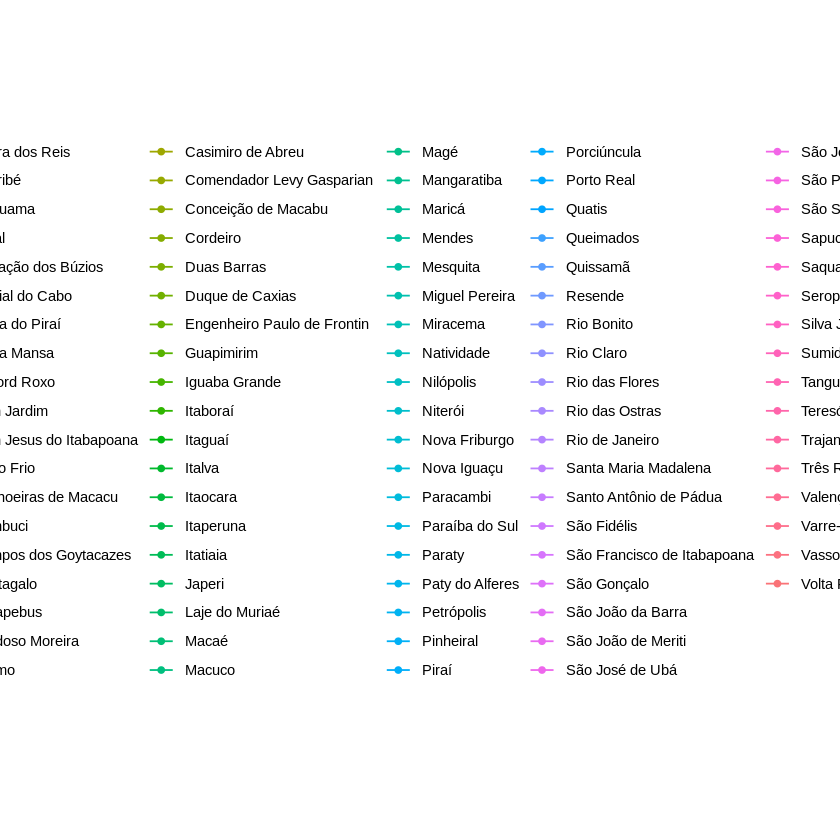

In [17]:
ggplot(dados, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Ops! Muita coisa para um só gráfico. Vamos remover a legenda.</p>

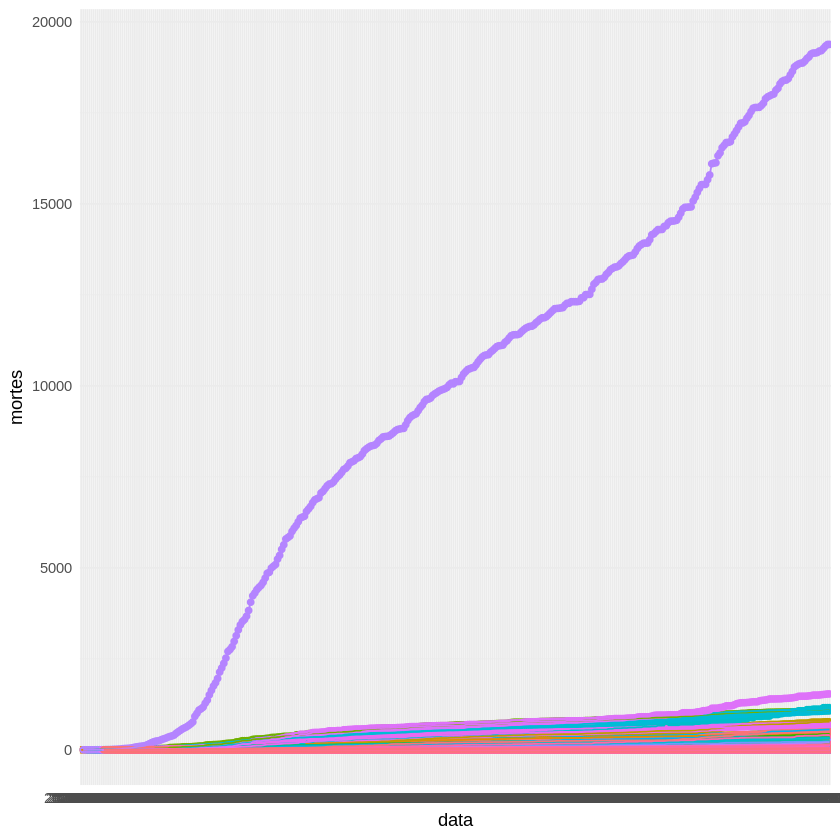

In [18]:
ggplot(dados, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Ops! Muitos dados para um só gráfico, além disso um município é muito maior que os outros. Vamos diminuir o conjunto, selecionando apenas alguns municípios para poder plotar.</p>

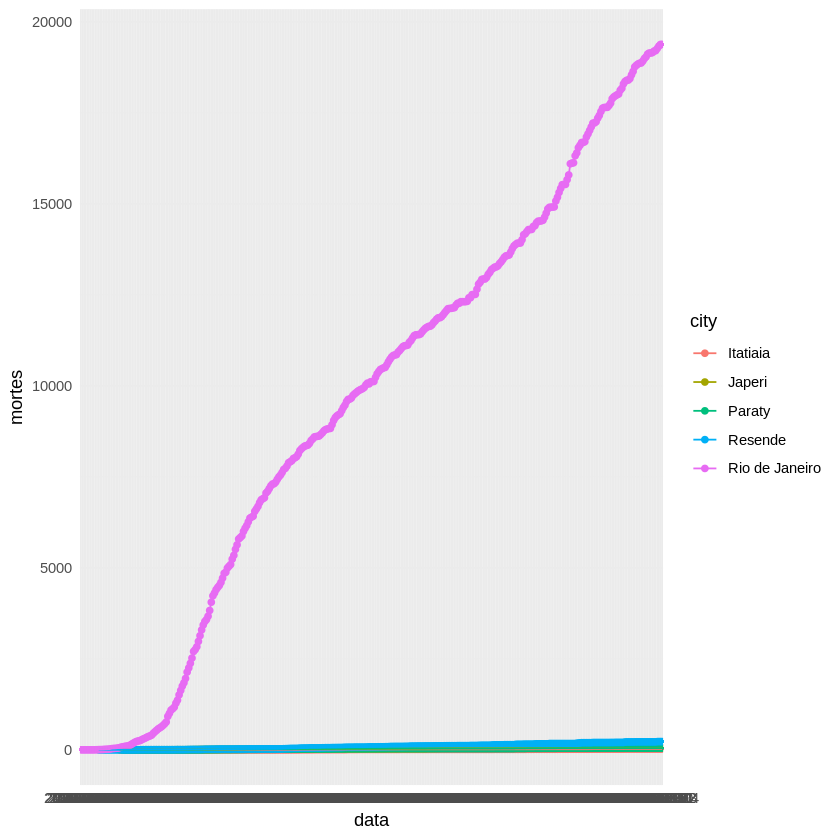

In [19]:
temp <- dados[dados$city %in% c("Japeri", "Resende", "Itatiaia", "Rio de Janeiro", "Paraty"), ]

ggplot(temp, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>O Rio de Janeiro cresce muito mais que os outros municípios, por ser uma região metropolitana. Assim não dá pra ver os outros. Vamos tirar o Rio de Janeiro por enquanto.</p>

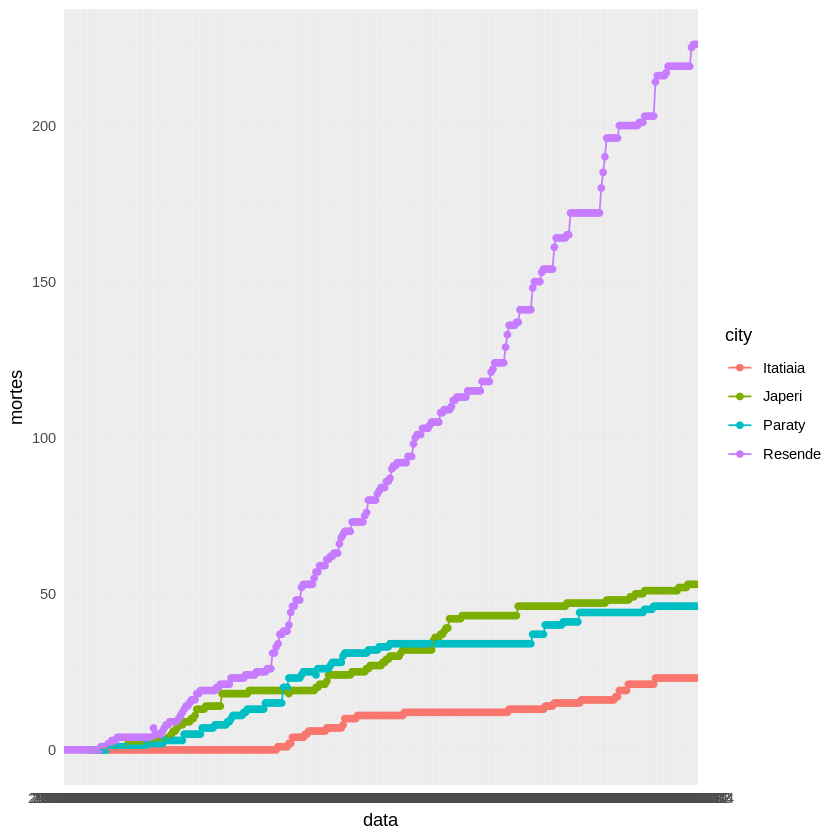

In [20]:
temp <- dados[dados$city %in% c("Japeri", "Resende", "Itatiaia", "Paraty"), ]

ggplot(temp, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>É importante observar que o gráfico só cresce! O dado de mortes é cumulativo!!! Eu não havia percebido isso até agora!</p>

<p>A data na parte de baixo do gráfico também não ficou boa...</p>